In [32]:
import os
import pandas as pd
import numpy as np
import librosa

def extract_features(file_path):

    y,sr = librosa.load(file_path, sr=None)
    features = np.array([])

    # Extract MFCC
    mfccs = np.mean(librosa.feature.mfcc(y=y,sr=sr, n_mfcc=13).T, axis=0)
    features = np.hstack((features,mfccs))

    # Extract chromagram
    stft = np.abs(librosa.stft(y))
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T, axis=0)
    features = np.hstack((features,chroma))

    #Extract Mel-scaled  spectogram
    mel = np.mean(librosa.feature.melspectrogram(y=y,sr=sr).T,axis=0)
    features = np.hstack((features,mel))

    #Extract spectral contrast
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sr).T, axis=0)
    features = np.hstack((features,contrast))

    # Extract tonnetz (tonal centroid)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(y),sr=sr).T, axis=0)
    features = np.hstack((features,tonnetz))

    return features


dataset_path = 'speech-emotion-recognition-ravdess-data'
features = []
labels = []
actor_count = 0

for actor_folder in os.listdir(dataset_path):
    actor_path = os.path.join(dataset_path, actor_folder)

    if not os.path.isdir(actor_path):
        continue

    for file_name in os.listdir(actor_path):
        if file_name.endswith('.wav'):
            file_path = os.path.join(actor_path, file_name)
            feature_vector = extract_features(file_path)
            emotion_label = int(file_name.split('-')[2])
            features.append(feature_vector)
            labels.append(emotion_label)


X = np.array(features)
y = np.array(labels)


print(f"Shape of feature array: {X.shape}")
print(f"Shape of label array: {y.shape}")

Shape of feature array: (1440, 166)
Shape of label array: (1440,)


In [33]:
print(X)
print(y)

#save it to .csv file
df = pd.DataFrame(X)
df['labels'] = y
df.to_csv('features.csv', index=False)


[[-4.19084900e+02  2.58726368e+01 -2.53285732e+01 ... -1.25231915e-02
   1.37319841e-02 -2.37145104e-03]
 [-4.62970459e+02  4.07926025e+01 -1.24082699e+01 ... -7.24190637e-03
   1.42959884e-02  4.24624146e-03]
 [-5.04816345e+02  3.53618660e+01 -1.43495779e+01 ...  1.42827085e-02
   3.92680255e-03 -9.51682134e-03]
 ...
 [-5.28396057e+02  3.60580826e+01  1.05310860e+01 ... -3.27147422e-02
   4.24752856e-02 -3.70507225e-03]
 [-5.19508362e+02  4.95244560e+01 -1.54960556e+01 ...  2.10673333e-02
   2.32123278e-02 -2.46137303e-04]
 [-5.25628235e+02  4.01392059e+01  5.55322647e+00 ... -3.41360771e-03
   4.55950458e-02 -1.75802010e-02]]
[6 5 7 ... 7 4 7]


Sample counts for each emotion class:
label
6    192
5    192
7    192
2    192
8    192
4    192
3    192
1     96
Name: count, dtype: int64
Minimum samples per emotion class: 96

Balanced dataset sample counts:
label
1    96
2    96
3    96
4    96
5    96
6    96
7    96
8    96
Name: count, dtype: int64
Balanced dataset saved to features.csv
Shape of training features: (614, 166)
Shape of training labels: (614,)
Shape of testing features: (154, 166)
Shape of testing labels: (154,)


/tmp/ipykernel_7976/3605490551.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('label').apply(lambda x: x.sample(min_samples)).reset_index(drop=True)
/tmp/ipykernel_7976/3605490551.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(X[:, start_idx:end_idx], labels=[f'{feature_name} {i+1}' for i in range(feature_dim)])
/tmp/ipykernel_7976/3605490551.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxp

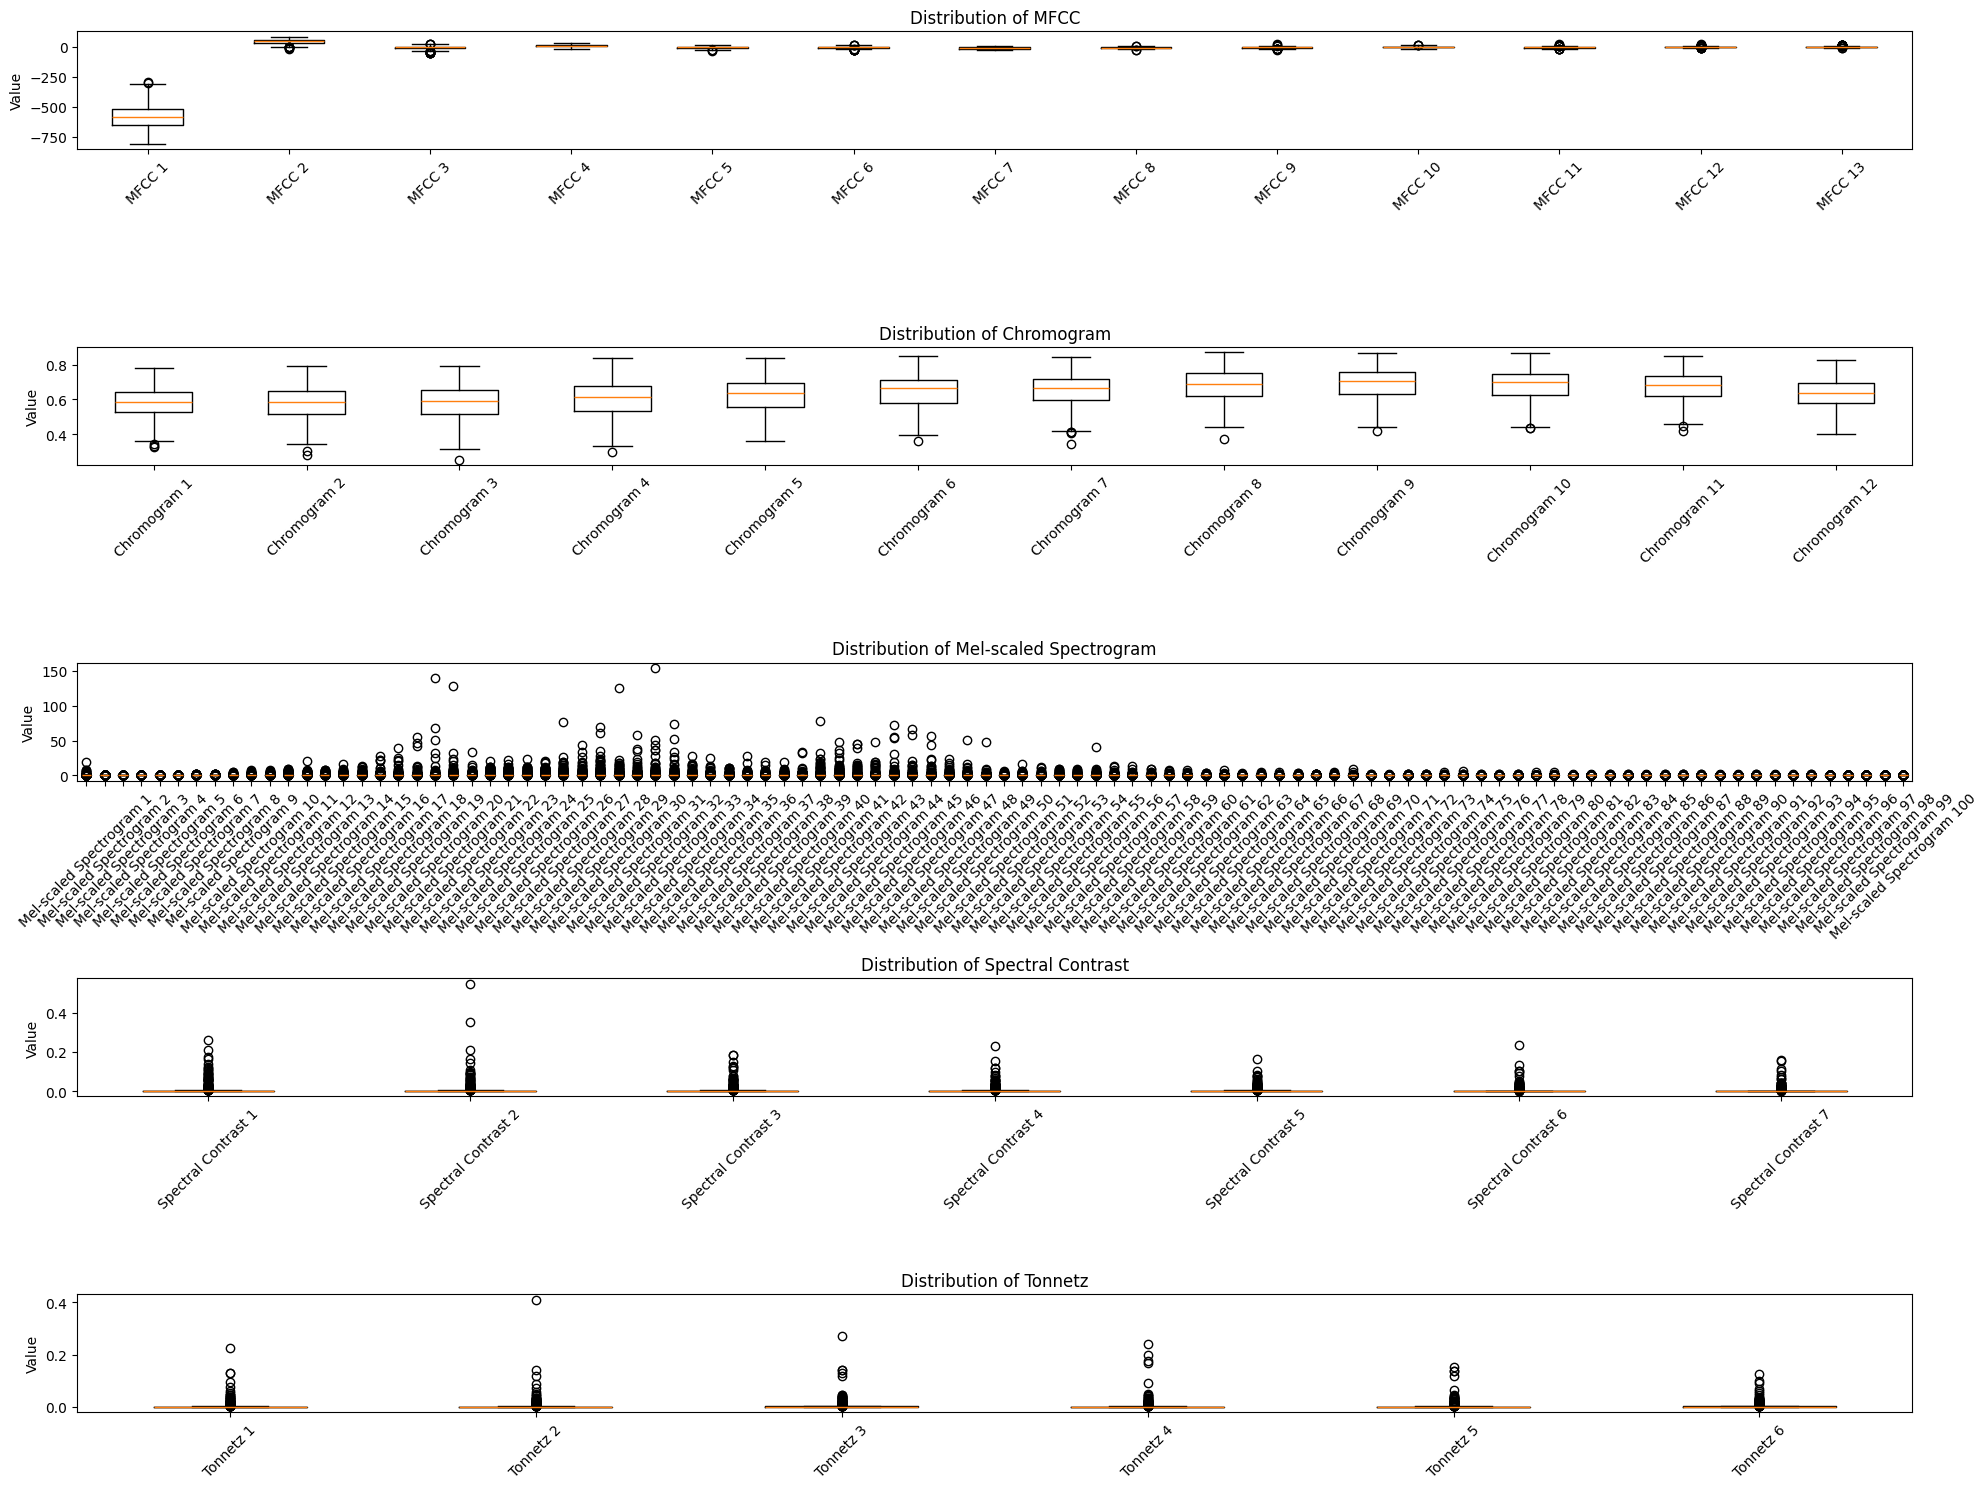

Shape of features after standardization: (768, 166)
Shape of encoded labels: (768,)
First 5 standardized feature vectors:
[[-1.70702714  0.13263851  1.2301182  -0.5402002  -0.39145407  0.93270547
  -0.0104982  -0.7039747   0.26004141 -0.12925591  0.16555844 -1.2515659
   0.74457387 -2.79588334 -2.49591996 -2.15736787 -1.57706947 -2.19501634
  -2.54798006 -2.17114304 -1.75594879 -1.68870649 -2.89002305 -3.0541394
  -2.60112135 -0.14305638 -0.13148584 -0.35732386 -0.3256096  -0.46692767
  -0.35620468 -0.26691042 -0.10256597 -0.28908083 -0.383525   -0.37058004
  -0.33254308 -0.28048152 -0.33018186 -0.29413661 -0.29089928 -0.24969805
  -0.20476877 -0.15820324 -0.11776303 -0.13770407 -0.26942433 -0.32993016
  -0.32012117 -0.31371811 -0.32829977 -0.21190478 -0.22419211 -0.21274615
  -0.14280628 -0.18187344 -0.13896508 -0.16496834 -0.2142879  -0.23452148
  -0.25645277 -0.18718165 -0.20374278 -0.22690821 -0.16790556 -0.16039307
  -0.18262533 -0.16138813 -0.17702266 -0.13145838 -0.13137692 -0.1

/home/shreya/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [39]:
feature_columns = [f'mfcc_{i+1}' for i in range(13)] + \
                  [f'chroma_{i+1}' for i in range(12)] + \
                  [f'mel_{i+1}' for i in range(128)] + \
                  [f'contrast_{i+1}' for i in range(7)] + \
                  [f'tonnetz_{i+1}' for i in range(6)]

df = pd.DataFrame(X, columns=feature_columns)
df['label'] = y  

# Save the DataFrame to a CSV file
csv_file_path = 'features.csv'
df.to_csv(csv_file_path, index=False)

import pandas as pd

# Load your dataset (assuming it's a CSV file)
df = pd.read_csv('features.csv')

emotion_counts = df['label'].value_counts()
print("Sample counts for each emotion class:")
print(emotion_counts)

min_samples = emotion_counts.min()
print(f'Minimum samples per emotion class: {min_samples}')

balanced_df = df.groupby('label').apply(lambda x: x.sample(min_samples)).reset_index(drop=True)

# Display counts of the balanced DataFrame
print("\nBalanced dataset sample counts:")
print(balanced_df['label'].value_counts())

# Optional: Save the balanced DataFrame to a new CSV file
balanced_csv_file_path = 'features.csv'
balanced_df.to_csv(balanced_csv_file_path, index=False)
print(f"Balanced dataset saved to {balanced_csv_file_path}")



import pandas as pd
from sklearn.model_selection import train_test_split

# Load your balanced dataset
balanced_df = pd.read_csv('features.csv')

# Separate features and labels
X = balanced_df.drop(columns=['label'])  # Features (all columns except 'label')
y = balanced_df['label']                  # Labels (the 'label' column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the resulting datasets
print(f"Shape of training features: {X_train.shape}")
print(f"Shape of training labels: {y_train.shape}")
print(f"Shape of testing features: {X_test.shape}")
print(f"Shape of testing labels: {y_test.shape}")


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your balanced dataset
balanced_df = pd.read_csv('features.csv')

# Extract features
X = balanced_df.drop(columns=['label']).to_numpy()

# Define feature names and their dimensions
feature_names = {
    'MFCC': 13,
    'Chromogram': 12,
    'Mel-scaled Spectrogram': 100,
    'Spectral Contrast': 7,
    'Tonnetz': 6
}

# Initialize plot
plt.figure(figsize=(20, 15))

# Start plotting the features
start_idx = 0
for feature_name, feature_dim in feature_names.items():
    end_idx = start_idx + feature_dim
    
    # Plot the features for each feature type
    plt.subplot(len(feature_names), 1, list(feature_names.keys()).index(feature_name) + 1)
    plt.boxplot(X[:, start_idx:end_idx], labels=[f'{feature_name} {i+1}' for i in range(feature_dim)])
    plt.title(f'Distribution of {feature_name}')
    plt.ylabel('Value')
    plt.xticks(rotation=45)

    start_idx = end_idx

plt.tight_layout()
plt.show()


import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the balanced dataset
balanced_df = pd.read_csv('features.csv')

# Separate features and labels
X = balanced_df.drop(columns=['label']).to_numpy()  # Features
y = balanced_df['label'].to_numpy()                 # Labels

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels
y_encoded = label_encoder.fit_transform(y)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_standardized = scaler.fit_transform(X)

# Print the shapes and first few rows of the processed data
print(f"Shape of features after standardization: {X_standardized.shape}")
print(f"Shape of encoded labels: {y_encoded.shape}")
print(f"First 5 standardized feature vectors:\n{X_standardized[:5]}")
print(f"First 5 encoded labels: {y_encoded[:5]}")


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the balanced dataset
balanced_df = pd.read_csv('features.csv')

# Separate features and labels
X = balanced_df.drop(columns=['label']).to_numpy()  # Features
y = balanced_df['label'].to_numpy()                 # Labels

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize featuresw
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)         # Only transform on testing data

# Construct the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,),  # You can adjust this
                          activation='relu',          # Activation function
                          solver='adam',             # Solver
                          max_iter=300,              # Number of iterations
                          random_state=42)

# Train the model with scaled features
mlp_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = mlp_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f"Accuracy of MLP model: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_str)